# **Cenário 2**

Criação de Modelo Preditivo para definir estatisticamente se um usuário irá adquirir um ingresso de Festival de Música promivido em plataforma Digital.

## Criação da Base de Dados Fictícios

In [2]:
# Instalação da Biblioteca Faker
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:00


In [3]:
#Importação das Bibliotecas Iniciais
import pandas as pd
import random
from faker import Faker

In [280]:
# Instanciando Faker
fake = Faker('pt_BR')

# Definição do número de linhas no conjunto fictício
num_linhas = 3985

# Definição das Faixas de Renda com idades correlacionadas
faixa_de_renda = ['Ate R$ 1.000,00', 'R$ 1.000,00 a R$ 3.500,00', 'Acima de R$ 3.500,00']

idades_por_faixa_de_renda = {
    'Ate R$ 1.000,00': (18, 26),
    'R$ 1.000,00 a R$ 3.500,00': (27, 35),
    'Acima de R$ 3.500,00': (36, 60)
}

# Lista de localizações
localizacao = ['Capital', 'Interior']

# Lista de Generos
genero_autodeclarado  = ['Masculino', 'Feminino','Nao-Binario','Nao declarado']

# Lista de Gêneros Musicais favoritos
genero_musical_favorito = ['Pop','Rock','Hip-Hop','Eletronica','Funk','Reggae','Sertanejo','Outros']

# Lista de posse de cartão de crédito
posse_cartao_de_credito = ["Sim", "Nao"]

# Lista de frequência de shows nos últimos 12 meses (Variável Resposta)
frequentou_show = ["Sim", "Nao"]

In [281]:
# Criando um DataFrame fictício com relações entre variáveis

def criar_registro(): # Função para criar um registro aleatório
    faixa = random.choice(faixa_de_renda)  # Escolher uma faixa de renda aleatória
    idade_min, idade_max = idades_por_faixa_de_renda[faixa]
    idade = random.randint(idade_min, idade_max)  # Gera uma idade dentro da faixa de renda
    possui_cartao = random.choice(posse_cartao_de_credito)
    frequentou_show = "Sim" if (possui_cartao == "Sim" and random.random() < 0.6) else "Sim" if random.random() < 0.3 else "Nao"

    return {
      "Nome": fake.first_name() + " " + fake.last_name() + " " + fake.first_name(),
      "Faixa de Renda": faixa,
      "Idade": idade,
      "Localizacao": random.choice(localizacao),
      "Genero Autodeclarado": random.choice(genero_autodeclarado),
      "Genero de Musica Favorito": random.choice(genero_musical_favorito),
      "Possui Cartao de Credito": possui_cartao,
      "Frequentou Show nos ultimos 12 Meses": frequentou_show
}

In [406]:
# Cria uma lista de dados
dados = [criar_registro() for _ in range(num_linhas)]

In [425]:
# Inserindo uma influência adicional para quem ouve música eletrônica
indices_eletronica_nao = [i for i in range(num_linhas) if dados[i]["Genero de Musica Favorito"] == "Eletronica" and dados[i]["Frequentou Show nos ultimos 12 Meses"] == "Nao"]

# Escolha aleatória de uma proporção
proporcao_substituir = 0.8

# Escolha aleatória da metade dos índices
indices_a_alterar = random.sample(indices_eletronica_nao, int(len(indices_eletronica_nao) * proporcao_substituir))


# Alterando a variável "Frequentou Show nos ultimos 12 Meses" para "Sim" nos índices selecionados
for i in indices_a_alterar:
    dados[i]["Frequentou Show nos ultimos 12 Meses"] = "Sim"

In [426]:
# Inserindo uma influência adicional para quem ouve música pop
indices_pop_nao = [i for i in range(num_linhas) if dados[i]["Genero de Musica Favorito"] == "Pop" and dados[i]["Frequentou Show nos ultimos 12 Meses"] == "Nao"]

# Escolha aleatória de uma proporção
proporcao_substituir = 0.8

# Escolha aleatória da metade dos índices
indices_a_alterar = random.sample(indices_pop_nao, int(len(indices_pop_nao) * proporcao_substituir))


# Alterando a variável "Frequentou Show nos ultimos 12 Meses" para "Sim" nos índices selecionados
for i in indices_a_alterar:
    dados[i]["Frequentou Show nos ultimos 12 Meses"] = "Sim"

In [419]:
# Inserindo uma influência adicional para quem ouve música Outros
indices_outros_nao = [i for i in range(num_linhas) if dados[i]["Genero de Musica Favorito"] == "Outros" and dados[i]["Frequentou Show nos ultimos 12 Meses"] == "Sim"]

# Escolha aleatória de uma proporção
proporcao_substituir = 0.6

# Escolha aleatória da metade dos índices
indices_a_alterar = random.sample(indices_outros_nao, int(len(indices_outros_nao) * proporcao_substituir))


# Alterando a variável "Frequentou Show nos ultimos 12 Meses" para "Nao" nos índices selecionados
for i in indices_a_alterar:
    dados[i]["Frequentou Show nos ultimos 12 Meses"] = "Nao"

In [420]:
# Inserindo uma influência adicional para Idades mais avançadas
indices_idade_sim = [i for i in range(num_linhas) if dados[i]["Idade"] > 31 and dados[i]["Frequentou Show nos ultimos 12 Meses"] == "Sim"]

# Escolha aleatória de uma proporção
proporcao_substituir = 0.7

# Escolha aleatória da metade dos índices
indices_a_alterar = random.sample(indices_idade_sim, int(len(indices_idade_sim) * proporcao_substituir))


# Alterando a variável "Frequentou Show nos ultimos 12 Meses" para "Nao" nos índices selecionados
for i in indices_a_alterar:
    dados[i]["Frequentou Show nos ultimos 12 Meses"] = "Nao"

In [421]:
# Inserindo uma influência adicional para Idades mais novas
indices_idade_nao = [i for i in range(num_linhas) if dados[i]["Idade"] < 27 and dados[i]["Frequentou Show nos ultimos 12 Meses"] == "Nao"]

# Escolha aleatória de uma proporção
proporcao_substituir = 0.6

# Escolha aleatória da metade dos índices
indices_a_alterar = random.sample(indices_idade_nao, int(len(indices_idade_nao) * proporcao_substituir))


# Alterando a variável "Frequentou Show nos ultimos 12 Meses" para "Nao" nos índices selecionados
for i in indices_a_alterar:
    dados[i]["Frequentou Show nos ultimos 12 Meses"] = "Sim"

In [422]:
# Inserindo uma influência adicional para quem vive na capital
indices_local_nao = [i for i in range(num_linhas) if dados[i]["Localizacao"] == "Capital" and dados[i]["Frequentou Show nos ultimos 12 Meses"] == "Nao"]

# Escolha aleatória de uma proporção
proporcao_substituir = 0.9

# Escolha aleatória da metade dos índices
indices_a_alterar = random.sample(indices_local_nao, int(len(indices_local_nao) * proporcao_substituir))


# Alterando a variável "Frequentou Show nos ultimos 12 Meses" para "Sim" nos índices selecionados
for i in indices_a_alterar:
    dados[i]["Frequentou Show nos ultimos 12 Meses"] = "Sim"

In [423]:
# Inserindo uma influência adicional para quem vive na capital
indices_local_sim = [i for i in range(num_linhas) if dados[i]["Localizacao"] == "Interior" and dados[i]["Frequentou Show nos ultimos 12 Meses"] == "Sim"]

# Escolha aleatória de uma proporção
proporcao_substituir = 0.9

# Escolha aleatória da metade dos índices
indices_a_alterar = random.sample(indices_local_sim, int(len(indices_local_sim) * proporcao_substituir))


# Alterando a variável "Frequentou Show nos ultimos 12 Meses" para "Sim" nos índices selecionados
for i in indices_a_alterar:
    dados[i]["Frequentou Show nos ultimos 12 Meses"] = "Nao"

In [427]:
# Calculando a proporção de "Sim" para quem ouve música eletrônica
total_eletronica = sum(1 for registro in dados if registro["Genero de Musica Favorito"] == "Eletronica")
total_eletronica_e_frequentou = sum(1 for registro in dados if registro["Genero de Musica Favorito"] == "Eletronica" and registro["Frequentou Show nos ultimos 12 Meses"] == "Sim")
proporcao_eletronica_e_frequentou = total_eletronica_e_frequentou / total_eletronica

print(f"Proporção de 'Sim' para quem ouve música eletrônica: {proporcao_eletronica_e_frequentou:.2%}")

Proporção de 'Sim' para quem ouve música eletrônica: 90.37%


In [428]:
# Inserindo alguns registros com outliers e sem relação
registros_anomalos = []
for _ in range(15):
    registro_anomalo = {
        "Nome": fake.first_name() + " " + fake.last_name(),
        "Faixa de Renda": "Ate R$ 1.000,00",
        "Idade": 80,
        "Localizacao": "Capital",
        "Genero Autodeclarado": "Feminino",
        "Genero de Musica Favorito": "Jazz",
        "Possui Cartao de Credito": "Nao",
        "Frequentou Show nos ultimos 12 Meses": "Nao"
    }
    registros_anomalos.append(registro_anomalo)

In [429]:
dados_finais = dados + registros_anomalos

In [430]:
# Inserindo dicionário em um DataFrame
festival = pd.DataFrame(dados_finais)

In [431]:
# Inserindo missing values em 4 colunas aleatórias para 5% do conjunto de dados
colunas = list(festival.columns)
colunas.remove("Nome") # Não quero que o nome seja um missing, pois não faria sentido

colunas_com_missing_values = random.sample(colunas, 4)
num_missing_values = int(0.05 * num_linhas)

for coluna in colunas_com_missing_values:
    indices_missing = random.sample(range(num_linhas), num_missing_values)
    festival.loc[indices_missing, coluna] = None

In [432]:
festival.head()

,Nome,Faixa de Renda,Idade,Localizacao,Genero Autodeclarado,Genero de Musica Favorito,Possui Cartao de Credito,Frequentou Show nos ultimos 12 Meses
0,Lucca Porto Melissa,"Ate R$ 1.000,00",22,Capital,Nao-Binario,Funk,Sim,Sim
1,Maria Cardoso Amanda,"Acima de R$ 3.500,00",45,Interior,Nao declarado,Eletronica,Nao,Sim
2,Vitor da Conceição Bruna,None,35,Interior,Nao-Binario,Sertanejo,Nao,Nao
3,Pietra Martins Luna,"Acima de R$ 3.500,00",48,Interior,Feminino,Outros,Nao,Nao
4,Rafaela Costa Fernando,"R$ 1.000,00 a R$ 3.500,00",30,Interior,Nao-Binario,Reggae,None,Nao


In [433]:
festival.describe()

,Idade
count,4000.000000
mean,33.453750
std,11.894525
min,18.000000
25%,24.000000
50%,31.000000
75%,41.000000
max,80.000000


In [434]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Nome                                  4000 non-null   object
 1   Faixa de Renda                        3801 non-null   object
 2   Idade                                 4000 non-null   int64 
 3   Localizacao                           3801 non-null   object
 4   Genero Autodeclarado                  4000 non-null   object
 5   Genero de Musica Favorito             3801 non-null   object
 6   Possui Cartao de Credito              3801 non-null   object
 7   Frequentou Show nos ultimos 12 Meses  4000 non-null   object
dtypes: int64(1), object(7)
memory usage: 250.1+ KB


## Limpeza e Tratamento de Dados

In [435]:
festival.head(2)

,Nome,Faixa de Renda,Idade,Localizacao,Genero Autodeclarado,Genero de Musica Favorito,Possui Cartao de Credito,Frequentou Show nos ultimos 12 Meses
0,Lucca Porto Melissa,"Ate R$ 1.000,00",22,Capital,Nao-Binario,Funk,Sim,Sim
1,Maria Cardoso Amanda,"Acima de R$ 3.500,00",45,Interior,Nao declarado,Eletronica,Nao,Sim


In [436]:
festival.tail(2)

,Nome,Faixa de Renda,Idade,Localizacao,Genero Autodeclarado,Genero de Musica Favorito,Possui Cartao de Credito,Frequentou Show nos ultimos 12 Meses
3998,Raul Monteiro,"Ate R$ 1.000,00",80,Capital,Feminino,Jazz,Nao,Nao
3999,Mirella Rocha,"Ate R$ 1.000,00",80,Capital,Feminino,Jazz,Nao,Nao


In [437]:
nomes_unicos = festival['Nome'].nunique()
print(f"Quantidade de nomes únicos: {nomes_unicos}")


Quantidade de nomes únicos: 3994


In [438]:
festival_backup = festival.copy()
festival.drop(columns=['Nome'], inplace=True)

In [439]:
festival.head(2)

,Faixa de Renda,Idade,Localizacao,Genero Autodeclarado,Genero de Musica Favorito,Possui Cartao de Credito,Frequentou Show nos ultimos 12 Meses
0,"Ate R$ 1.000,00",22,Capital,Nao-Binario,Funk,Sim,Sim
1,"Acima de R$ 3.500,00",45,Interior,Nao declarado,Eletronica,Nao,Sim


In [440]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Faixa de Renda                        3801 non-null   object
 1   Idade                                 4000 non-null   int64 
 2   Localizacao                           3801 non-null   object
 3   Genero Autodeclarado                  4000 non-null   object
 4   Genero de Musica Favorito             3801 non-null   object
 5   Possui Cartao de Credito              3801 non-null   object
 6   Frequentou Show nos ultimos 12 Meses  4000 non-null   object
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [441]:
valores_nulos = festival.isnull().sum()
total_linhas = len(festival)
percentual_nulos = (valores_nulos / total_linhas * 100).round(2).astype(str) + "%"
df_nulos = pd.DataFrame({'Valores Nulos': valores_nulos, 'Percentual do Total': percentual_nulos})
df_nulos

,Valores Nulos,Percentual do Total
Faixa de Renda,199,4.98%
Idade,0,0.0%
Localizacao,199,4.98%
Genero Autodeclarado,0,0.0%
Genero de Musica Favorito,199,4.98%
Possui Cartao de Credito,199,4.98%
Frequentou Show nos ultimos 12 Meses,0,0.0%


In [442]:
festival_sem_nulos = festival.dropna()

In [443]:
festival_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3259 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Faixa de Renda                        3259 non-null   object
 1   Idade                                 3259 non-null   int64 
 2   Localizacao                           3259 non-null   object
 3   Genero Autodeclarado                  3259 non-null   object
 4   Genero de Musica Favorito             3259 non-null   object
 5   Possui Cartao de Credito              3259 non-null   object
 6   Frequentou Show nos ultimos 12 Meses  3259 non-null   object
dtypes: int64(1), object(6)
memory usage: 203.7+ KB


Devido estarem em diferentes linhas, vamos avaliar e seguir com essas linhas para não ter perdas significativas em nosso conjunto

In [444]:
dados_nulos = festival[~festival.index.isin(festival_sem_nulos.index)]
dados_nulos

,Faixa de Renda,Idade,Localizacao,Genero Autodeclarado,Genero de Musica Favorito,Possui Cartao de Credito,Frequentou Show nos ultimos 12 Meses
2,None,35,Interior,Nao-Binario,Sertanejo,Nao,Nao
4,"R$ 1.000,00 a R$ 3.500,00",30,Interior,Nao-Binario,Reggae,None,Nao
8,"R$ 1.000,00 a R$ 3.500,00",35,Interior,Masculino,None,Nao,Nao
13,"Acima de R$ 3.500,00",47,Capital,Nao-Binario,None,Nao,Sim
19,"Ate R$ 1.000,00",22,Interior,Nao declarado,None,Nao,Nao
...,...,...,...,...,...,...,...
3963,"Acima de R$ 3.500,00",38,None,Masculino,Pop,Nao,Sim
3971,"Ate R$ 1.000,00",21,None,Masculino,Sertanejo,Sim,Sim
3973,"R$ 1.000,00 a R$ 3.500,00",31,Interior,Nao-Binario,Pop,None,Sim
3975,"Acima de R$ 3.500,00",50,Capital,Nao declarado,None,Nao,Sim


In [445]:
contagem_localizacao = festival['Localizacao'].value_counts()
contagem_cartao = festival['Possui Cartao de Credito'].value_counts()
contagem_resposta = festival['Frequentou Show nos ultimos 12 Meses'].value_counts()
print(contagem_localizacao)
print(contagem_cartao)
print(contagem_resposta)

Interior    1913
Capital     1888
Name: Localizacao, dtype: int64
Nao    1907
Sim    1894
Name: Possui Cartao de Credito, dtype: int64
Sim    2361
Nao    1639
Name: Frequentou Show nos ultimos 12 Meses, dtype: int64


**Variável Localização:**


*   Capital > 1
*   Interior > 0

Variável **Possui Cartao de Credito:**


1.   Sim > 1
2.   Nao > 0

Variável **Frequentou Show nos ultimos 12 Meses:**


1.   Sim > 1
2.   Nao > 0

In [446]:
# Informando quem receberá 1 nas colunas desejadas
mapeamento = {'Capital': 1, 'Sim': 1, 'Interior': 0, 'Nao': 0}

# Descrição das colunas transformadas
colunas = ['Localizacao', 'Possui Cartao de Credito', 'Frequentou Show nos ultimos 12 Meses']

for coluna in colunas:
    festival[coluna] = festival[coluna].map(mapeamento)

In [447]:
contagem_localizacao = festival['Localizacao'].value_counts()
contagem_cartao = festival['Possui Cartao de Credito'].value_counts()
contagem_resposta = festival['Frequentou Show nos ultimos 12 Meses'].value_counts()
print(contagem_localizacao)
print(contagem_cartao)
print(contagem_resposta)

0.0    1913
1.0    1888
Name: Localizacao, dtype: int64
0.0    1907
1.0    1894
Name: Possui Cartao de Credito, dtype: int64
1    2361
0    1639
Name: Frequentou Show nos ultimos 12 Meses, dtype: int64


In [448]:
festival

,Faixa de Renda,Idade,Localizacao,Genero Autodeclarado,Genero de Musica Favorito,Possui Cartao de Credito,Frequentou Show nos ultimos 12 Meses
0,"Ate R$ 1.000,00",22,1.0,Nao-Binario,Funk,1.0,1
1,"Acima de R$ 3.500,00",45,0.0,Nao declarado,Eletronica,0.0,1
2,None,35,0.0,Nao-Binario,Sertanejo,0.0,0
3,"Acima de R$ 3.500,00",48,0.0,Feminino,Outros,0.0,0
4,"R$ 1.000,00 a R$ 3.500,00",30,0.0,Nao-Binario,Reggae,NaN,0
...,...,...,...,...,...,...,...
3995,"Ate R$ 1.000,00",80,1.0,Feminino,Jazz,0.0,0
3996,"Ate R$ 1.000,00",80,1.0,Feminino,Jazz,0.0,0
3997,"Ate R$ 1.000,00",80,1.0,Feminino,Jazz,0.0,0
3998,"Ate R$ 1.000,00",80,1.0,Feminino,Jazz,0.0,0


## Análise Exploratória Unidimensional

In [449]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Faixa de Renda                        3801 non-null   object 
 1   Idade                                 4000 non-null   int64  
 2   Localizacao                           3801 non-null   float64
 3   Genero Autodeclarado                  4000 non-null   object 
 4   Genero de Musica Favorito             3801 non-null   object 
 5   Possui Cartao de Credito              3801 non-null   float64
 6   Frequentou Show nos ultimos 12 Meses  4000 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 218.9+ KB


A variável ***Faixa de Renda*** é variável categórica informando a Renda do Respondente.

A variável ***Idade*** é uma variável numérica que informa a idade do respondente.

A variável ***Localização*** é uma variável também numérica, mas binária, devido aos tratamentos anteriores.

A variável ***Genero Autodeclarado*** é uma variável categórica porém é um dado sensível que deve ser utilizado mediante altos graus de confidencialidade e autorização do respondente.

A variável ***Genero de Musica Favorito*** é uma variável categórica

A variável ***Possui Cartao de Credito*** é uma variável também numérica, mas binária, devido aos tratamentos anteriores.

A variável ***Frequentou Show nos ultimos 12 Meses*** é uma variável também numérica, mas binária, devido aos tratamentos anteriores. Será também a variável resposta do nosso modelo.

In [450]:
import matplotlib.pyplot as plt
import seaborn as sns

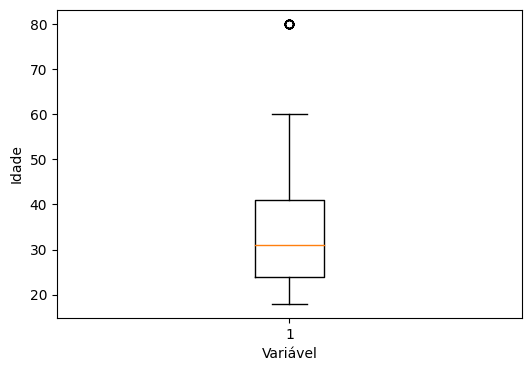

In [451]:
# Análise da Variável Idade por meio de boxplot
# Crie uma cópia temporária do DataFrame com os valores nulos preenchidos
festival_temp = festival.copy()

plt.figure(figsize=(6, 4))

# Criando um boxplot da variável 'Idade'
plt.boxplot(festival_temp['Idade'].dropna())  # Removendo valores nulos apenas para o boxplot

# Adicione rótulos aos eixos
plt.xlabel('Variável')
plt.ylabel('Idade')
plt.show()

 Conforme podemos analisar acima, a idade mínima para essa variável é 18 e a idade máxima 60 com outliers com 80 no valor. A moda está em cerca de 30 anos.
 A seguir devemos identificar quantos outliers contém na amostra para que seja feita a limpeza dependendo da representatividade.

In [452]:
idade_maior_que_60 = festival[festival['Idade'] > 60]
idade_maior_que_60['Idade'].count()

15

In [453]:
contador_total = festival['Idade'].count()
contador_filtrado = idade_maior_que_60['Idade'].count()

percentual = (contador_filtrado / contador_total)*100.00
percentual

0.375

Ou seja, apenas 0,39% contém presença de outliers que podem ser removidos da amotra para não gerar ruído no modelo.

In [454]:
festival = festival[(festival['Idade'] <= 60) | (festival['Idade'].isnull())]

In [455]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 0 to 3984
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Faixa de Renda                        3786 non-null   object 
 1   Idade                                 3985 non-null   int64  
 2   Localizacao                           3786 non-null   float64
 3   Genero Autodeclarado                  3985 non-null   object 
 4   Genero de Musica Favorito             3786 non-null   object 
 5   Possui Cartao de Credito              3786 non-null   float64
 6   Frequentou Show nos ultimos 12 Meses  3985 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 249.1+ KB


In [456]:
# Análise da Variável Faixa de Renda
tabela_de_contagem = festival['Faixa de Renda'].value_counts().reset_index()
tabela_de_contagem.columns = ['Faixa Renda', 'Quantidade']
total_entradas = len(festival)
tabela_de_contagem['Percentual'] = ((tabela_de_contagem['Quantidade'] / total_entradas) * 100).round(2).astype(str) + '%'
tabela_de_contagem['Quantidade'] = tabela_de_contagem['Quantidade'].apply(lambda x: f'{x:,}') # Incluindo pontuação de milhar

tabela_de_contagem

,Faixa Renda,Quantidade,Percentual
0,"Ate R$ 1.000,00","1,293",32.45%
1,"R$ 1.000,00 a R$ 3.500,00","1,277",32.05%
2,"Acima de R$ 3.500,00","1,216",30.51%


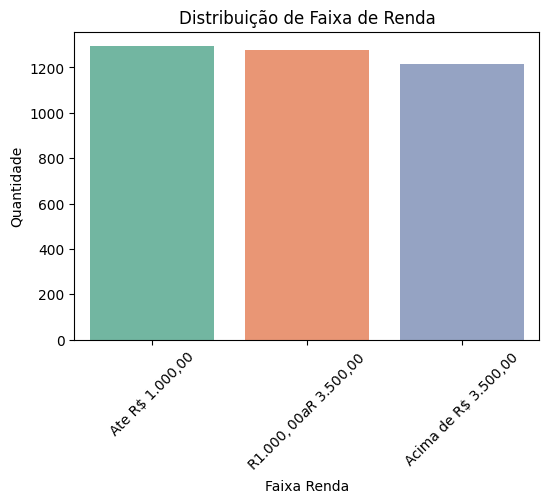

In [457]:
# Gráfico de barras
tabela_de_contagem = festival['Faixa de Renda'].value_counts().reset_index()
tabela_de_contagem.columns = ['Faixa Renda', 'Quantidade']
plt.figure(figsize=(6, 4))
sns.barplot(data=tabela_de_contagem, x='Faixa Renda', y='Quantidade', palette='Set2')
plt.ylabel('Quantidade')
plt.title('Distribuição de Faixa de Renda')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.show()

Não há presença de outliers ou nulos nessa variável.

In [458]:
# Análise da Variável Genero Autodeclarado
tabela_de_contagem = festival['Genero Autodeclarado'].value_counts().reset_index()
tabela_de_contagem.columns = ['Genero', 'Quantidade']
total_entradas = len(festival)
tabela_de_contagem['Percentual'] = ((tabela_de_contagem['Quantidade'] / total_entradas) * 100).round(2).astype(str) + '%'
tabela_de_contagem['Quantidade'] = tabela_de_contagem['Quantidade'].apply(lambda x: f'{x:,}') # Incluindo pontuação de milhar

tabela_de_contagem

,Genero,Quantidade,Percentual
0,Masculino,"1,017",25.52%
1,Feminino,"1,000",25.09%
2,Nao declarado,999,25.07%
3,Nao-Binario,969,24.32%


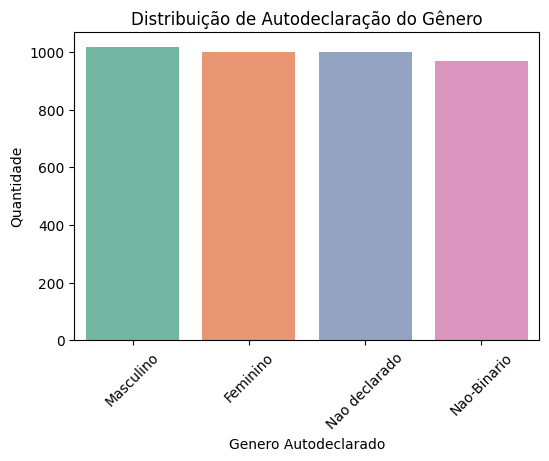

In [459]:
# Gráfico de barras
tabela_de_contagem = festival['Genero Autodeclarado'].value_counts().reset_index()
tabela_de_contagem.columns = ['Genero Autodeclarado', 'Quantidade']
plt.figure(figsize=(6, 4))
sns.barplot(data=tabela_de_contagem, x='Genero Autodeclarado', y='Quantidade', palette='Set2')
plt.ylabel('Quantidade')
plt.title('Distribuição de Autodeclaração do Gênero')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.show()

Não há presença de outliers ou nulos nessa variável.

In [460]:
# Análise da Variável Genero de Musica Favorito
tabela_de_contagem = festival['Genero de Musica Favorito'].value_counts().reset_index()
tabela_de_contagem.columns = ['Estilo', 'Quantidade']
total_entradas = len(festival)
tabela_de_contagem['Percentual'] = ((tabela_de_contagem['Quantidade'] / total_entradas) * 100).round(2).astype(str) + '%'
tabela_de_contagem['Quantidade'] = tabela_de_contagem['Quantidade'].apply(lambda x: f'{x:,}') # Incluindo pontuação de milhar

tabela_de_contagem

,Estilo,Quantidade,Percentual
0,Sertanejo,506,12.7%
1,Hip-Hop,498,12.5%
2,Rock,490,12.3%
3,Eletronica,484,12.15%
4,Pop,461,11.57%
5,Outros,457,11.47%
6,Funk,446,11.19%
7,Reggae,444,11.14%


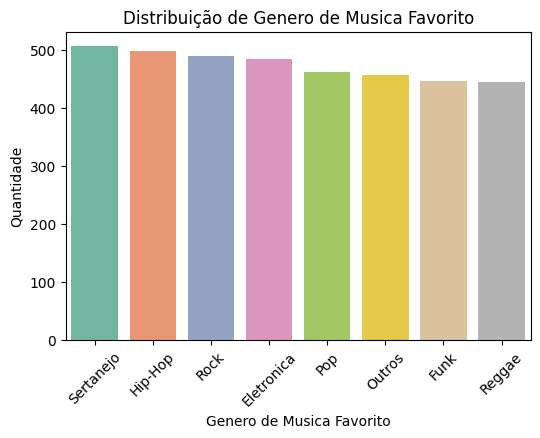

In [461]:
# Gráfico de barras
tabela_de_contagem = festival['Genero de Musica Favorito'].value_counts().reset_index()
tabela_de_contagem.columns = ['Genero de Musica Favorito', 'Quantidade']
plt.figure(figsize=(6, 4))
sns.barplot(data=tabela_de_contagem, x='Genero de Musica Favorito', y='Quantidade', palette='Set2')
plt.ylabel('Quantidade')
plt.title('Distribuição de Genero de Musica Favorito')
plt.xticks(rotation=45)  # Rotacione os rótulos no eixo x para melhor legibilidade
plt.show()

Não há presença de outliers ou nulos nessa variável.

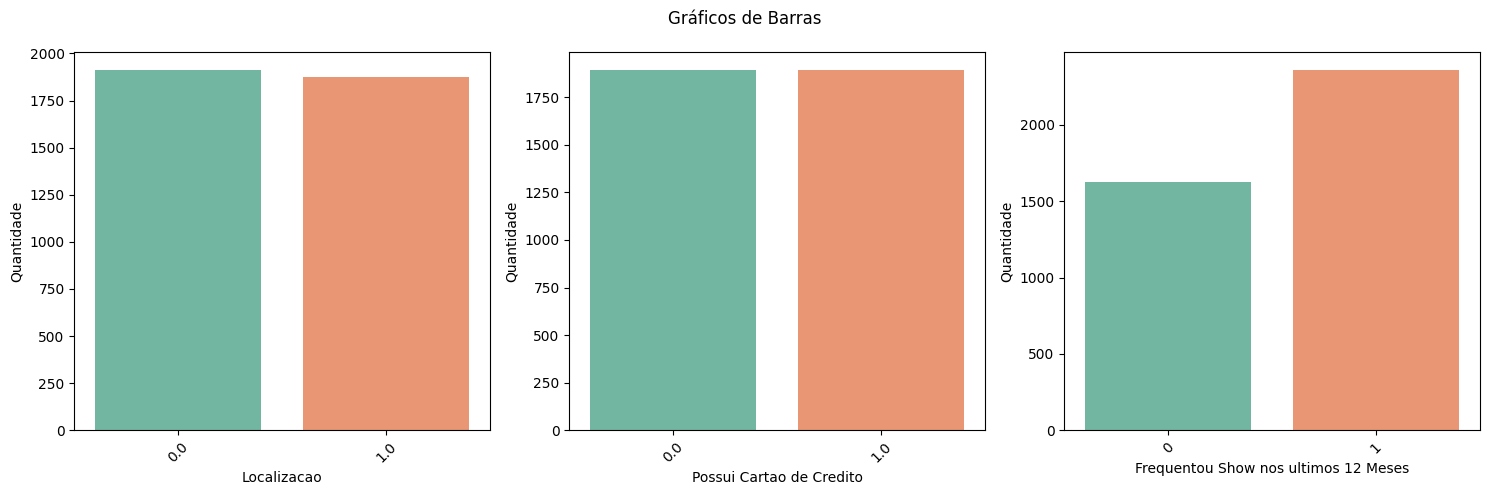

In [462]:
#Análise das Variáveis Binárias (Localizacao, Possui Cartao de Credito e Frequentou Show nos ultimos 12 Meses)
variaveis_binarias = ['Localizacao', 'Possui Cartao de Credito', 'Frequentou Show nos ultimos 12 Meses']

#Subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Gráficos de Barras')

for i, variavel in enumerate(variaveis_binarias):
    plt.subplot(1, 3, i+1)
    tabela_de_contagem = festival[variavel].value_counts().reset_index()
    tabela_de_contagem.columns = [variavel, 'Quantidade']
    paleta_neutra = sns.color_palette("Set2")
    sns.barplot(data=tabela_de_contagem, x=variavel, y='Quantidade', palette=paleta_neutra)
    plt.xlabel(variavel)
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()






In [463]:
# Tabelas agrupadas
for variavel in variaveis_binarias:
    tabela_agrupada = festival[variavel].value_counts().reset_index()
    tabela_agrupada.columns = [variavel, 'Quantidade']

    total_entradas = len(festival)
    tabela_agrupada['Percentual'] = (tabela_agrupada['Quantidade'] / total_entradas * 100).round(2)

    print(f"Tabela agrupada por {variavel}:\n")
    print(tabela_agrupada)
    print("\n")

Tabela agrupada por Localizacao:

   Localizacao  Quantidade  Percentual
0          0.0        1913       48.01
1          1.0        1873       47.00


Tabela agrupada por Possui Cartao de Credito:

   Possui Cartao de Credito  Quantidade  Percentual
0                       1.0        1894       47.53
1                       0.0        1892       47.48


Tabela agrupada por Frequentou Show nos ultimos 12 Meses:

   Frequentou Show nos ultimos 12 Meses  Quantidade  Percentual
0                                     1        2361       59.25
1                                     0        1624       40.75




In [464]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 0 to 3984
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Faixa de Renda                        3786 non-null   object 
 1   Idade                                 3985 non-null   int64  
 2   Localizacao                           3786 non-null   float64
 3   Genero Autodeclarado                  3985 non-null   object 
 4   Genero de Musica Favorito             3786 non-null   object 
 5   Possui Cartao de Credito              3786 non-null   float64
 6   Frequentou Show nos ultimos 12 Meses  3985 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 249.1+ KB


Não há presença de outliers nas 3 variáveis.

## Análise Bidimensional
### Relações entre duas variáveis.

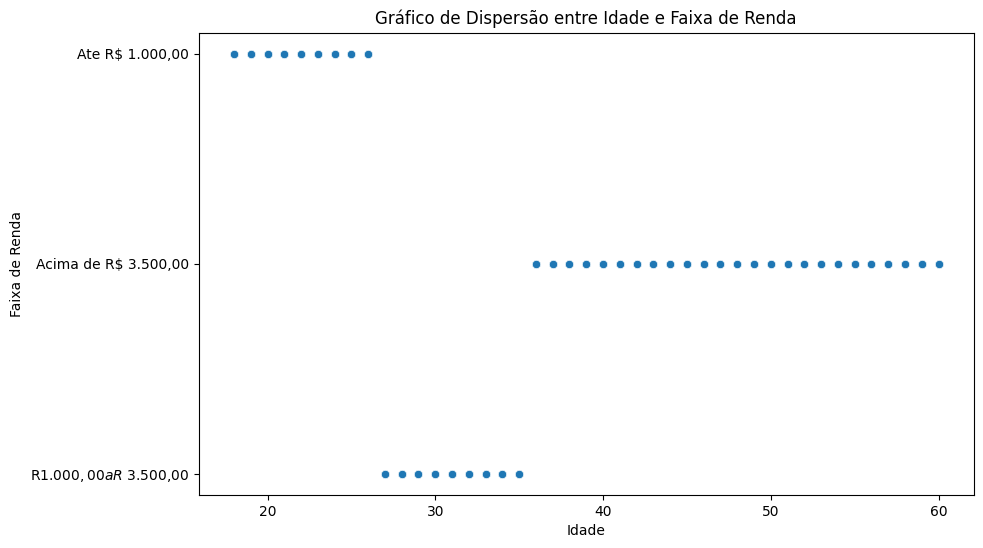

In [465]:
# Faixa de Renda e Idade
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
paleta_neutra = sns.color_palette("Set2")
sns.scatterplot(data=festival, x='Idade', y='Faixa de Renda')
plt.xlabel('Idade')
plt.ylabel('Faixa de Renda')
plt.title('Gráfico de Dispersão entre Idade e Faixa de Renda')
plt.show()

Já podemos notar uma correlação direta entre Idade e Faixa de Renda.

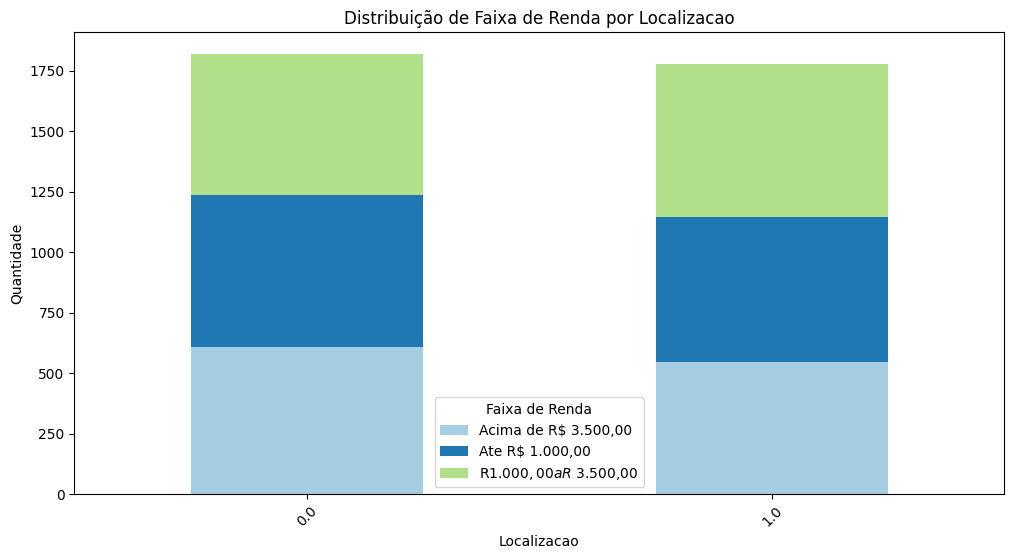

In [466]:
contagem = festival.groupby(['Localizacao', 'Faixa de Renda']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Localizacao')
plt.ylabel('Quantidade')
plt.title('Distribuição de Faixa de Renda por Localizacao')
plt.show()

Sem correlação entre variáveis Faixa de Renda e Localizacao.

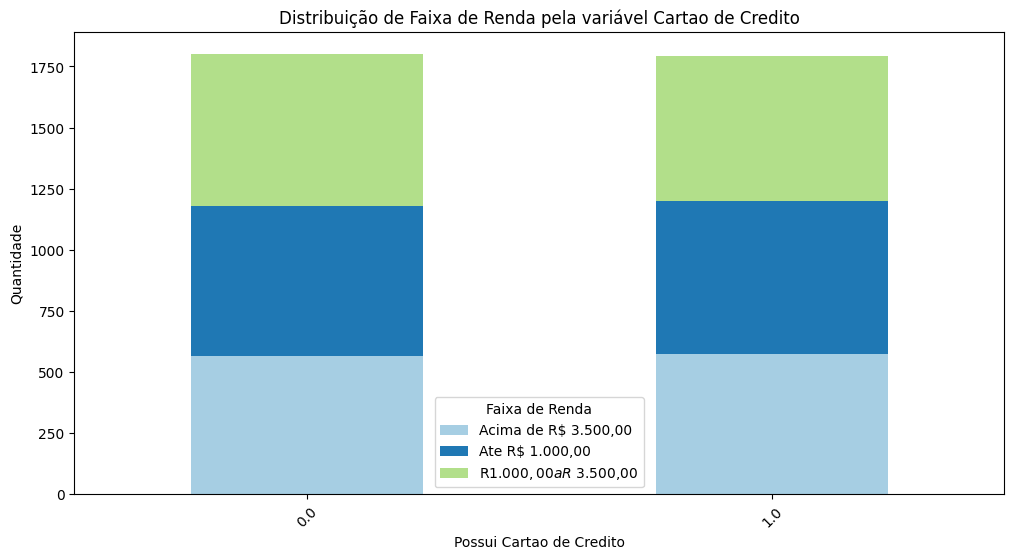

In [467]:
# Faixa de Renda com Possui Cartao de Credito
contagem = festival.groupby(['Possui Cartao de Credito', 'Faixa de Renda']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Possui Cartao de Credito')
plt.ylabel('Quantidade')
plt.title('Distribuição de Faixa de Renda pela variável Cartao de Credito')
plt.show()

Não há nenhuma correlação entre Renda e Posse de Cartão de Credito

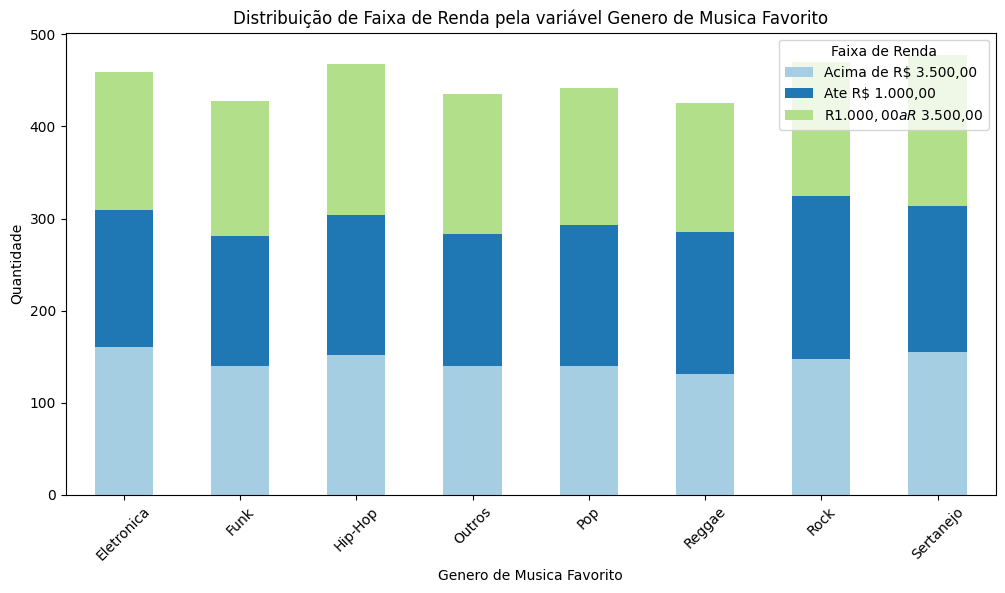

In [468]:
# Faixa de Renda com Genero de Musica Favorito
contagem = festival.groupby(['Genero de Musica Favorito', 'Faixa de Renda']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Genero de Musica Favorito')
plt.ylabel('Quantidade')
plt.title('Distribuição de Faixa de Renda pela variável Genero de Musica Favorito')
plt.show()

A distribuição da amostra se mantém muito heterogênea e aleatória, sem correlação entre as variáveis de Gênero Musical Favorito e Faixa de Renda.

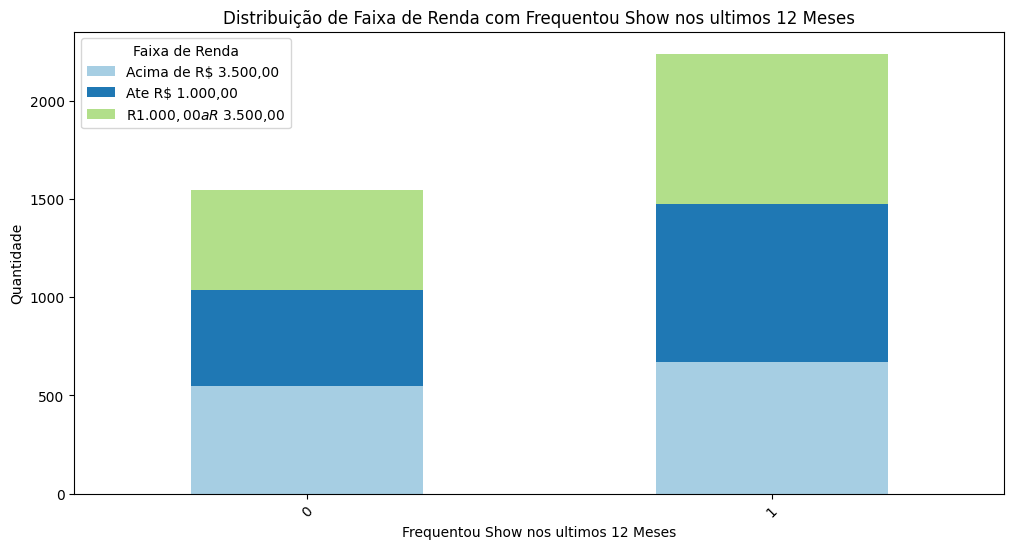

In [469]:
# Faixa de Renda com Frequentou Show nos ultimos 12 meses (alvo)
contagem = festival.groupby(['Frequentou Show nos ultimos 12 Meses', 'Faixa de Renda']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Frequentou Show nos ultimos 12 Meses')
plt.ylabel('Quantidade')
plt.title('Distribuição de Faixa de Renda com Frequentou Show nos ultimos 12 Meses')
plt.show()

Também não há uma relação direta entre Faixa de Renda e Frequência em Shows.

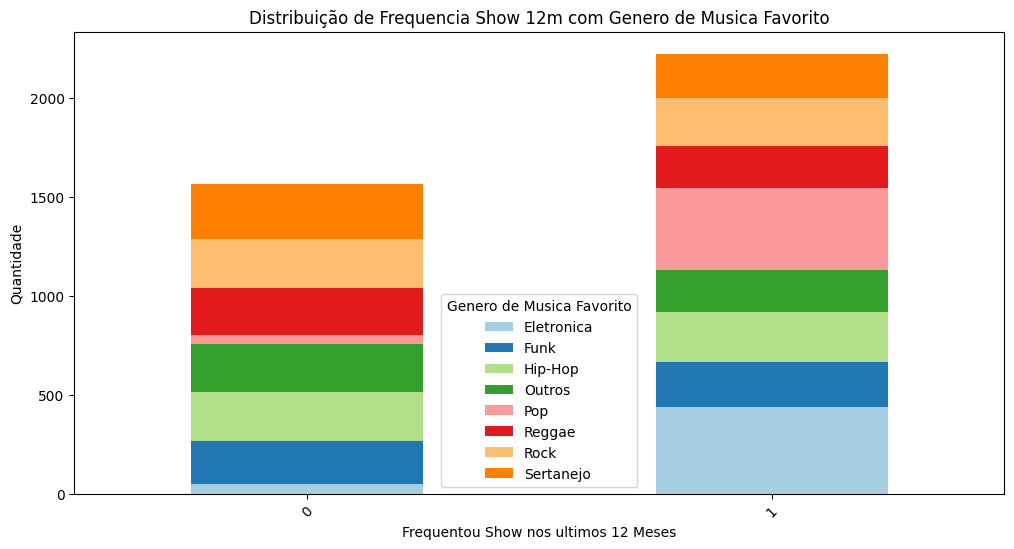

In [470]:
# Frequentou Show nos ultimos 12 meses (alvo) e Gênero Musical Favorito
contagem = festival.groupby(['Frequentou Show nos ultimos 12 Meses', 'Genero de Musica Favorito']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Frequentou Show nos ultimos 12 Meses')
plt.ylabel('Quantidade')
plt.title('Distribuição de Frequencia Show 12m com Genero de Musica Favorito')
plt.show()

In [471]:
# Análise da Variável Genero de Musical Favorito
tabela_agrupada = festival.groupby("Genero de Musica Favorito")["Frequentou Show nos ultimos 12 Meses"].value_counts(normalize=True).unstack().fillna(0)
tabela_agrupada["Percentual de Sim"] = tabela_agrupada[1] * 100
tabela_agrupada = tabela_agrupada.reset_index()
tabela_agrupada[["Genero de Musica Favorito", "Percentual de Sim"]]


Frequentou Show nos ultimos 12 Meses,Genero de Musica Favorito,Percentual de Sim
0,Eletronica,90.289256
1,Funk,50.896861
2,Hip-Hop,50.803213
3,Outros,46.389497
4,Pop,89.804772
5,Reggae,47.522523
6,Rock,49.591837
7,Sertanejo,44.466403


Há uma correlação entre alguns valores de gênero musical com o fato de ter ido a um show nos ultimos 12 meses.

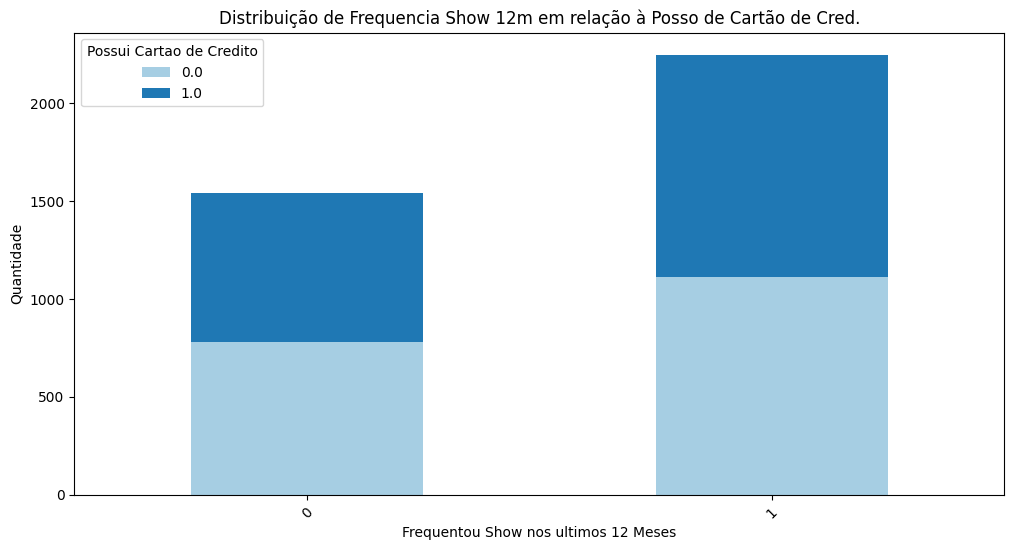

In [472]:
# Frequentou Show nos ultimos 12 meses (alvo) e Posse de Cartão de credito
contagem = festival.groupby(['Frequentou Show nos ultimos 12 Meses', 'Possui Cartao de Credito']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Frequentou Show nos ultimos 12 Meses')
plt.ylabel('Quantidade')
plt.title('Distribuição de Frequencia Show 12m em relação à Posso de Cartão de Cred.')
plt.show()

In [473]:
# Análise da Variável Possui Cartao de Credito em relação ao alvo
tabela_agrupada = festival.groupby("Possui Cartao de Credito")["Frequentou Show nos ultimos 12 Meses"].value_counts(normalize=True).unstack().fillna(0)
tabela_agrupada["Percentual de Sim"] = tabela_agrupada[1] * 100
tabela_agrupada = tabela_agrupada.reset_index()
tabela_agrupada[["Possui Cartao de Credito", "Percentual de Sim"]]

Frequentou Show nos ultimos 12 Meses,Possui Cartao de Credito,Percentual de Sim
0,0.0,58.720930
1,1.0,59.978881


Baixa correlação.

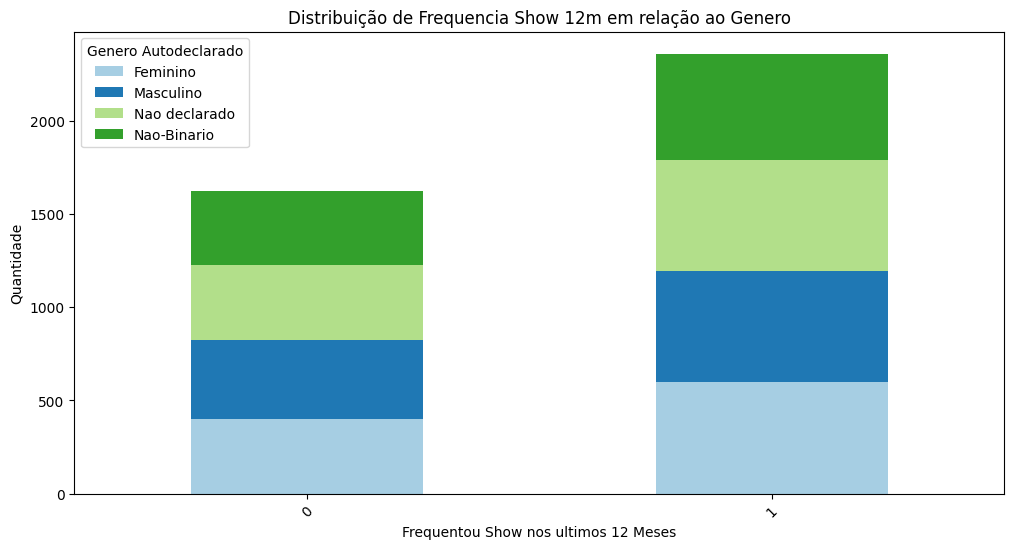

In [474]:
# Analise entre o Gênero Autodeclarado e a variável alvo
contagem = festival.groupby(['Frequentou Show nos ultimos 12 Meses', 'Genero Autodeclarado']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Frequentou Show nos ultimos 12 Meses')
plt.ylabel('Quantidade')
plt.title('Distribuição de Frequencia Show 12m em relação ao Genero')
plt.show()

Sem correlação com a variável resposta

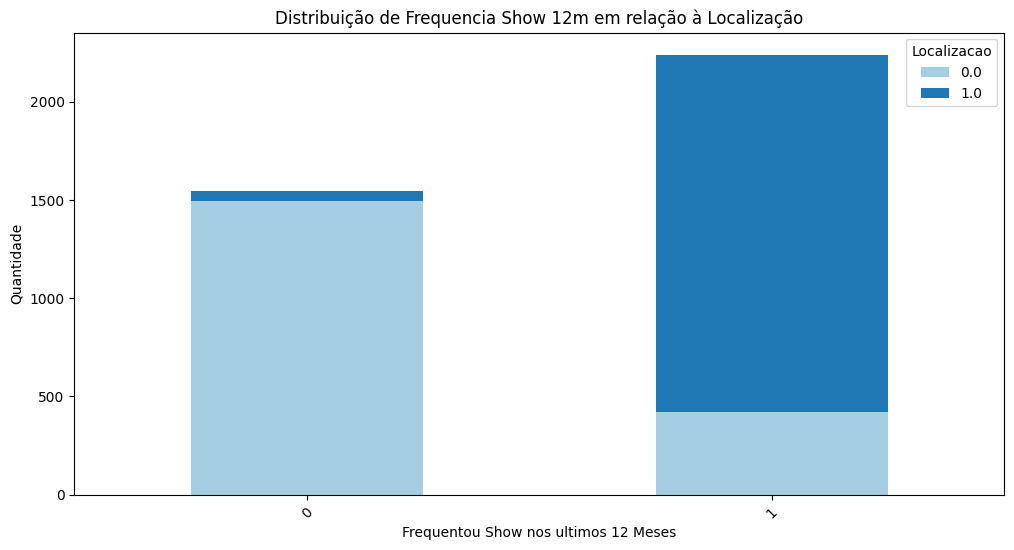

In [475]:
# Analise entre o Loalizacao e a variável alvo
contagem = festival.groupby(['Frequentou Show nos ultimos 12 Meses', 'Localizacao']).size().unstack(fill_value=0)
colors = plt.cm.Paired(range(len(contagem.columns)))

plt.figure(figsize=(12, 6))
contagem.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())
plt.xticks(rotation=45)
plt.xlabel('Frequentou Show nos ultimos 12 Meses')
plt.ylabel('Quantidade')
plt.title('Distribuição de Frequencia Show 12m em relação à Localização')
plt.show()

Alta correlação entre morar na capital e frequentar algum show nos últmos 12 meses

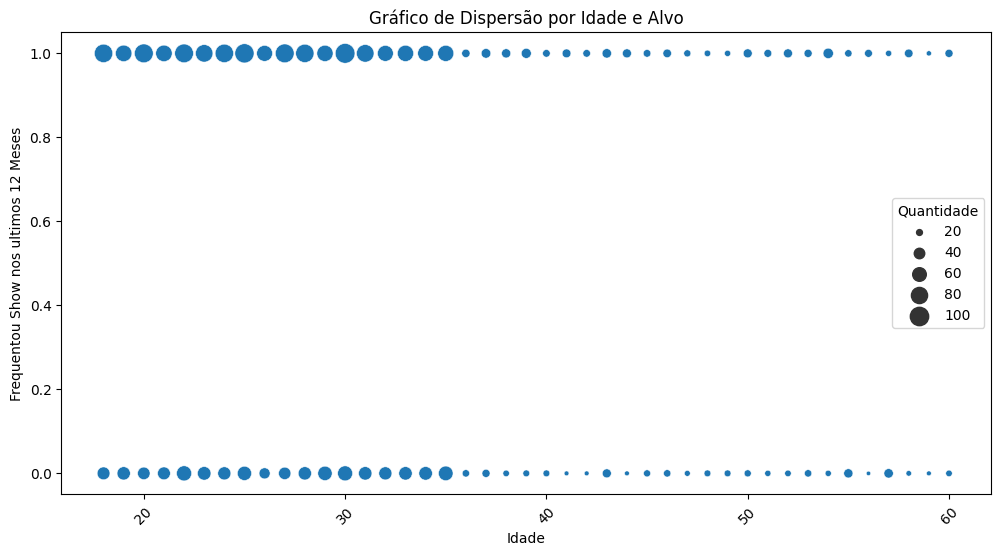

In [478]:
# Gráfico de Dispersão das variáveis Idade e Frequentou show nos últimoss 12 meses
contagem = festival.groupby(['Idade', 'Frequentou Show nos ultimos 12 Meses']).size().reset_index(name='Quantidade')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=contagem, x='Idade', y='Frequentou Show nos ultimos 12 Meses', size='Quantidade', sizes=(10, 200))
plt.xticks(rotation=45)
plt.xlabel('Idade')
plt.ylabel('Frequentou Show nos ultimos 12 Meses')
plt.title('Gráfico de Dispersão por Idade e Alvo')
plt.show()

Há uma certa influência em idades entre 18 a 35 anos serem mais propensas a frequentar algum show, a partir da análise acima

**Conclusão da Análise EDA:** Como das variáveis analisadas acima, apenas as variáveis Genero Musical Favorito, Localizacao, Idade e Possui Cartao de Credito, possui uma correlação com a nossa variável resposta, vamos seguir nosso modelo utilizando inicialmente essas duas variáveis como entrada.

 ## **Início do Treino para Machine Learning no notebook Colab Enterprise:**

In [519]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import multilabel_confusion_matrix, classification_report,confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB

In [339]:
festival.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3985 entries, 0 to 3984
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Faixa de Renda                        3985 non-null   object 
 1   Idade                                 3786 non-null   float64
 2   Localizacao                           3985 non-null   int64  
 3   Genero Autodeclarado                  3786 non-null   object 
 4   Genero de Musica Favorito             3786 non-null   object 
 5   Possui Cartao de Credito              3985 non-null   int64  
 6   Frequentou Show nos ultimos 12 Meses  3786 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 249.1+ KB


In [480]:
# Excluindo valores nulos dessas variáveis de entrada
festival_treinamento = festival.copy()
festival_treinamento = festival_treinamento.dropna(subset=['Genero de Musica Favorito', 'Possui Cartao de Credito','Frequentou Show nos ultimos 12 Meses','Idade','Localizacao'])

In [481]:
festival_treinamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3414 entries, 0 to 3984
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Faixa de Renda                        3244 non-null   object 
 1   Idade                                 3414 non-null   int64  
 2   Localizacao                           3414 non-null   float64
 3   Genero Autodeclarado                  3414 non-null   object 
 4   Genero de Musica Favorito             3414 non-null   object 
 5   Possui Cartao de Credito              3414 non-null   float64
 6   Frequentou Show nos ultimos 12 Meses  3414 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 213.4+ KB


In [483]:
# Definindo as colunas de entrada e saída
X = festival_treinamento[['Genero de Musica Favorito', 'Possui Cartao de Credito','Localizacao','Idade']]
y = festival_treinamento[['Frequentou Show nos ultimos 12 Meses']]

In [484]:
X

,Genero de Musica Favorito,Possui Cartao de Credito,Localizacao,Idade
0,Funk,1.0,1.0,22
1,Eletronica,0.0,0.0,45
2,Sertanejo,0.0,0.0,35
3,Outros,0.0,0.0,48
5,Hip-Hop,1.0,1.0,39
...,...,...,...,...
3980,Outros,1.0,0.0,28
3981,Rock,0.0,1.0,20
3982,Funk,1.0,1.0,33
3983,Hip-Hop,0.0,0.0,19


In [485]:
y

,Frequentou Show nos ultimos 12 Meses
0,1
1,1
2,0
3,0
5,1
...,...
3980,0
3981,1
3982,1
3983,0


In [486]:
# Dividindo o conjunto de dados em treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

In [487]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((2389, 4), (1025, 4), (2389, 1), (1025, 1))

# Modelo de Classificação Floresta Randômica

In [488]:
# Codificando a variável categórica em texto
colunas_categoricas = ['Genero de Musica Favorito']
transformador = ColumnTransformer(transformers=[('cat', OneHotEncoder(), colunas_categoricas)], remainder='passthrough')

# Modelo de classificação Floresta Randômica com 100 árvores de decisão
modelo = Pipeline(steps=[('preprocessor', transformador), ('model', RandomForestClassifier(n_estimators=100, random_state=42))])
modelo.fit(X_treino, y_treino['Frequentou Show nos ultimos 12 Meses'].ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['Genero de Musica '
                                                   'Favorito'])])),
                ('model', RandomForestClassifier(random_state=42))])

Acurácia: 0.9346341463414635
Precisão: 0.9345846881374733
Recall: 0.9346341463414635
F1-Score: 0.934497967614005


Matriz de Confusão:




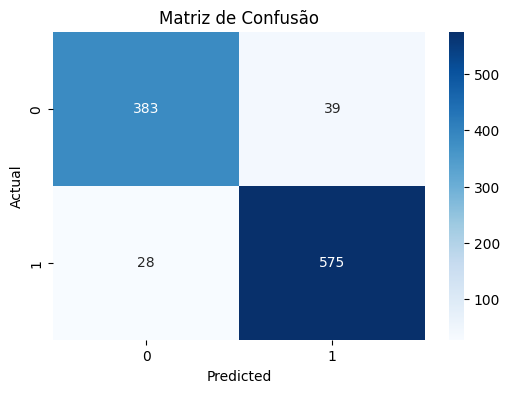

Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       422
           1       0.94      0.95      0.94       603

    accuracy                           0.93      1025
   macro avg       0.93      0.93      0.93      1025
weighted avg       0.93      0.93      0.93      1025



In [489]:
# Previsões com os dados de teste
predicao = modelo.predict(X_teste)

# Calcula a acurácia usando a função accuracy_score
acuracia = accuracy_score(y_teste, predicao)

# Calcula a precisão usando a função precision_score
precisao = precision_score(y_teste, predicao, average ='weighted', zero_division=0)
#usamos average ='weighted' quando desejamos dar mais peso às classes que
#tem mais amostras como em nosso conjunto de dados

# Calcula o recall usando a função recall_score
recall = recall_score(y_teste, predicao, average ='weighted', zero_division=0)

# Calcula o F1-score usando a função f1_score
f1 = f1_score(y_teste, predicao, average ='weighted', zero_division=0)

# Calcula a matriz de confusão
Confusao = confusion_matrix(y_teste, predicao)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, predicao)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

A partir do F1-Score e Acurácia acima, identificamos que o modelo está com alto desempenho, pois analisando o F1-Score de 0.93 entendemos que o modeloestá atingindo um alto equilíbrio entre precisão e recall.

A métrica de Acurácia também está alta (0.93) acertando 93% das predições.

Analisando a matriz de confusão também percebemos um alto valor no Verdadeito Positivo (TP) e Verdadeiro Negativo (TN)

Avaliaremos com outros modelos se conseguimos atingir 95% de f1-Score

# Modelo de Classificação Gradient Boosting Machine (Biblioteca xgboost)

In [490]:
# Criar a base do modelo XGBoost
colunas_categoricas = ['Genero de Musica Favorito']
transformador = ColumnTransformer(transformers=[('cat', OneHotEncoder(), colunas_categoricas)], remainder='passthrough')

X_treino_codificado = transformador.fit_transform(X_treino)
X_teste_codificado = transformador.transform(X_teste)

GBM = XGBClassifier()
GBM.fit(X_treino_codificado, y_treino)
Predicao_GBM = GBM.predict(X_teste_codificado)

Acurácia: 0.9453658536585365
Precisão: 0.9455862723069761
Recall: 0.9453658536585365
F1-Score: 0.9451722880140068


Matriz de Confusão:




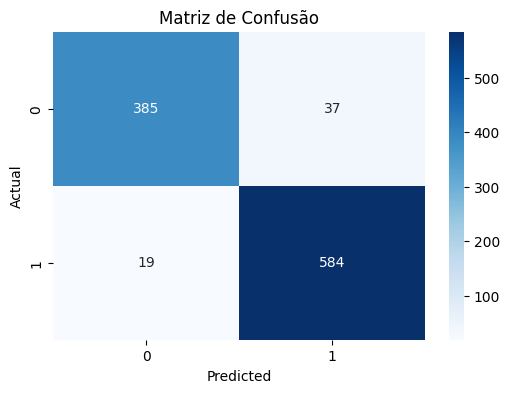



Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       422
           1       0.94      0.97      0.95       603

    accuracy                           0.95      1025
   macro avg       0.95      0.94      0.94      1025
weighted avg       0.95      0.95      0.95      1025



In [491]:
# Acurácia
acuracia = accuracy_score(y_teste, Predicao_GBM)

# Precisão
precisao = precision_score(y_teste, Predicao_GBM, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, Predicao_GBM, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, Predicao_GBM, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, Predicao_GBM)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, Predicao_GBM)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

A partir do F1-Score e Acurácia acima, identificamos que o modelo está com alto desempenho e melhorou em 2% pois analisando o F1-Score de 0.95 entendemos que o modelo atingindo um alto equilíbrio entre precisão e recall.

A métrica de Acurácia também está alta (0.95) acertando agora 95% das predições.

Analisando a matriz de confusão também percebemos um alto valor no Verdadeito Positivo (TP) e Verdadeiro Negativo (TN)

Avaliaremos com outros modelos se conseguimos passar de 95% de f1-Score

# Modelo de Classificação Gradient Boosting Machine (Biblioteca Scikit-Learn)

In [493]:
Gradient_Boost_Model = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=42)

# Treine o modelo com os dados de treinamento
Gradient_Boost_Model.fit(X_treino_codificado, y_treino['Frequentou Show nos ultimos 12 Meses'].ravel())

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=10,
                           random_state=42)

Acurácia: 0.9521951219512195
Precisão: 0.9536084831721868
Recall: 0.9521951219512195
F1-Score: 0.9518591463287199


Matriz de Confusão:




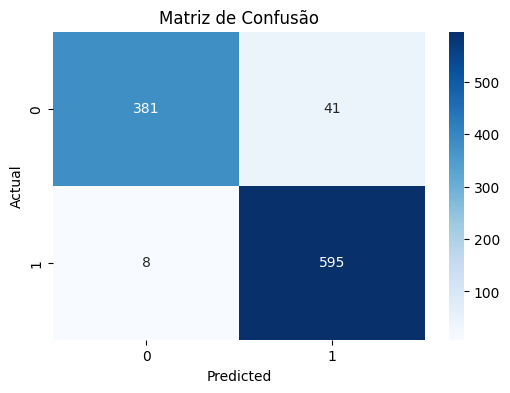



Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       422
           1       0.94      0.99      0.96       603

    accuracy                           0.95      1025
   macro avg       0.96      0.94      0.95      1025
weighted avg       0.95      0.95      0.95      1025



In [494]:
Predicao_Gradient_B_M = Gradient_Boost_Model.predict(X_teste_codificado)

# Acurácia
acuracia = accuracy_score(y_teste, Predicao_Gradient_B_M)

# Precisão
precisao = precision_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, Predicao_Gradient_B_M, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, Predicao_Gradient_B_M)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(6, 4))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, Predicao_Gradient_B_M)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

A partir do F1-Score e Acurácia acima, identificamos que o modelo está com alto desempenho e manteve o F1-Score de 0.95 entendemos que o modelo atingindo um alto equilíbrio entre precisão e recall.

A métrica de Acurácia também está alta (0.95) acertando 95% das predições.

Analisando a matriz de confusão também percebemos um alto valor no Verdadeito Positivo (TP) e Verdadeiro Negativo (TN)

Avaliaremos com outros modelos se conseguimos passar de 95% de f1-Score

# Modelo de Classificação K-Nearest Neighbors (KNN)

In [497]:
# K-Nearest Neighbors (KNN)
KNN = KNeighborsClassifier(n_neighbors=2)

# Treine o modelo com os dados de treinamento
KNN.fit(X_treino_codificado, y_treino)

# Faça previsões no conjunto de teste
predicao = KNN.predict(X_teste_codificado)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Acurácia: 0.8321951219512195
Precisão: 0.8512606735885889
Recall: 0.8321951219512195
F1-Score: 0.8334898293646968


Matriz de Confusão:




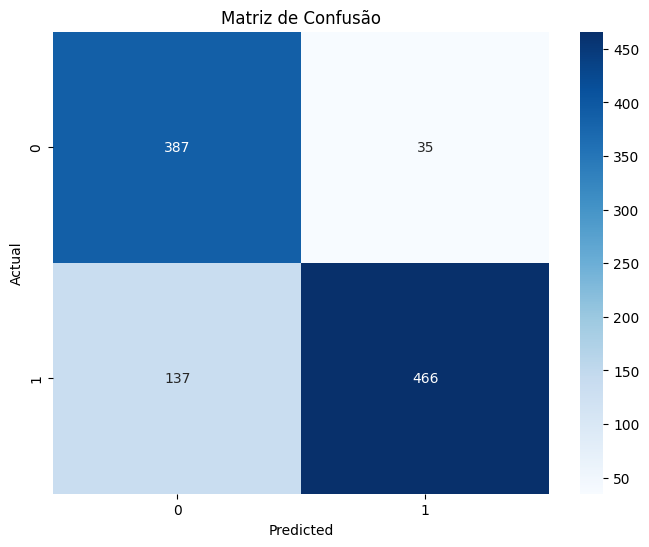



Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.74      0.92      0.82       422
           1       0.93      0.77      0.84       603

    accuracy                           0.83      1025
   macro avg       0.83      0.84      0.83      1025
weighted avg       0.85      0.83      0.83      1025



In [498]:
# Acurácia
acuracia = accuracy_score(y_teste, predicao)

# Precisão
precisao = precision_score(y_teste, predicao, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, predicao, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, predicao, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, predicao)

# Exibe todas as métricas e a matriz de confusão
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Exiba a matriz de confusão usando seaborn
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, predicao)
print('\n')
print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

O algorítmo KNN não atendeu às expectativas nesse caso, gerando um f1-score de 83.

# Modelo de Classificação Árvore de Decisão

Acurácia: 0.9239024390243903
Precisão: 0.9242238163558105
Recall: 0.9239024390243903
F1-Score: 0.9240056225622802


Matriz de Confusão:




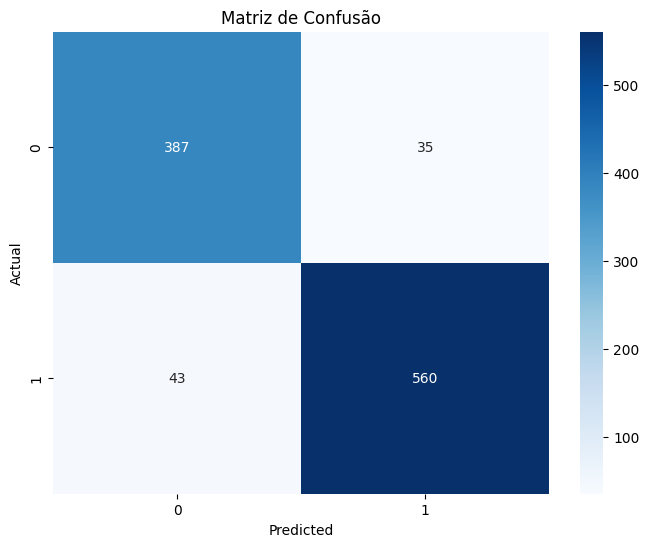

Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       422
           1       0.94      0.93      0.93       603

    accuracy                           0.92      1025
   macro avg       0.92      0.92      0.92      1025
weighted avg       0.92      0.92      0.92      1025



In [517]:
# Árvore de Decisão
dtc = DecisionTreeClassifier()
dtc.fit(X_treino_codificado, y_treino)
dtc_predicao = dtc.predict(X_teste_codificado)

# Acurácia
acuracia = accuracy_score(y_teste, dtc_predicao)

# Precisão
precisao = precision_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, dtc_predicao, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, dtc_predicao)

# Exibe todas as métricas
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Matriz de confusão
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, dtc_predicao)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

O resultado foi inferior aos demais algorítmos utilizados

# Modelo de Classificação Naive Bayes

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia: 0.9521951219512195
Precisão: 0.9536084831721868
Recall: 0.9521951219512195
F1-Score: 0.9518591463287199


Matriz de Confusão:




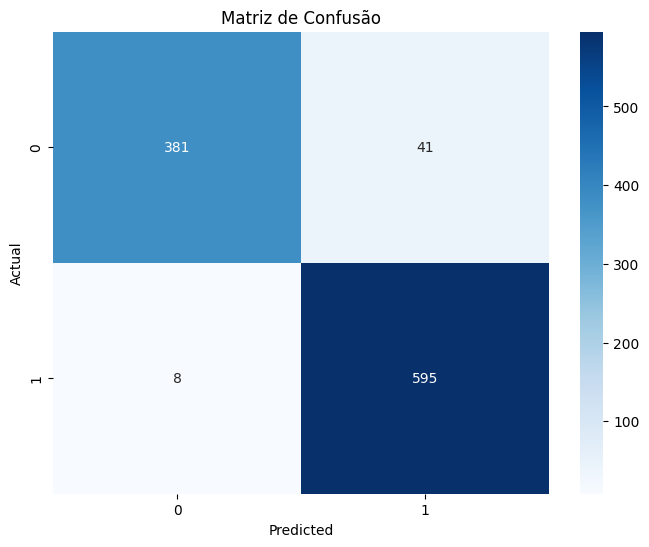

Relatório de Classificação:


              precision    recall  f1-score   support

           0       0.98      0.90      0.94       422
           1       0.94      0.99      0.96       603

    accuracy                           0.95      1025
   macro avg       0.96      0.94      0.95      1025
weighted avg       0.95      0.95      0.95      1025



In [521]:
NB_Multi = BernoulliNB()
NB_Multi.fit(X_treino_codificado, y_treino)
NB_pred = NB_Multi.predict(X_teste_codificado)

# Acurácia
acuracia = accuracy_score(y_teste, NB_pred)

# Precisão
precisao = precision_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# Recall
recall = recall_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# F1-score
f1 = f1_score(y_teste, NB_pred, average ='weighted', zero_division=0)

# Matriz de confusão
Confusao = confusion_matrix(y_teste, NB_pred)

# Exibe todas as métricas
print(f'\033[1mAcurácia:\033[0m {acuracia}')
print(f'\033[1mPrecisão:\033[0m {precisao}')
print(f'\033[1mRecall:\033[0m {recall}')
print(f'\033[1mF1-Score:\033[0m {f1}')
print('\n')

# Matriz de confusão
print(f'\033[1mMatriz de Confusão:\033[0m')
print('\n')
plt.figure(figsize=(8, 6))
sns.heatmap(Confusao, annot=True, fmt="d", cmap="Blues")# xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusão")
plt.show()

# Relatório de Classificação por Valor do Alvo
report = classification_report(y_teste, NB_pred)

print(f'\033[1mRelatório de Classificação:\033[0m')
print('\n')
print(report)

O Algoritmo de classificação de Naive Bayes também trouxe uma alta acurácia e F1-Score, tornando uma boa alternativa para nosso cenário.

Considerando o retorno de F1-Score, Precisão, Recall e Acurácia, seguiremos com **Naive Bayes** devido sua simplicidade e eficiência operacional e rapidez para treinar as previsões.

In [522]:
from google.cloud import storage
project_id = 'ultimate-flame-398623'
bucket_name = 'teste_bucket_daniel'
destination_blob_name = 'Festival_Vertex_teste.csv'

In [523]:
# Inicialize o cliente de armazenamento do Google Cloud
storage_client = storage.Client(project=project_id)

# Carregue o DataFrame diretamente no Cloud Storage como um arquivo CSV
festival_envio = festival[['Genero de Musica Favorito', 'Possui Cartao de Credito','Localizacao','Idade','Frequentou Show nos ultimos 12 Meses']]

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(destination_blob_name)
blob.upload_from_string(festival_envio.to_csv(index=False), content_type='text/csv')